In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy

In [2]:
torch.manual_seed(1)

In [14]:
x_train = torch.FloatTensor([[1],[2],[3]])
y_train = torch.FloatTensor([[2],[4],[6]])
x_train

tensor([[1.],
        [2.],
        [3.]])

In [4]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
        
    def forward(self, x):
        x = self.linear(x)
        return x

In [5]:
model = Net()

In [6]:
optimizer = optim.SGD(model.parameters(), lr=0.01)

In [7]:
nb_epochs = 2000
for epoch in range(nb_epochs+1):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost:{:6f}'.format(
        epoch, nb_epochs, cost.item()
    ))

Epoch    0/2000 Cost:13.103541
Epoch  100/2000 Cost:0.002791
Epoch  200/2000 Cost:0.001724
Epoch  300/2000 Cost:0.001066
Epoch  400/2000 Cost:0.000658
Epoch  500/2000 Cost:0.000407
Epoch  600/2000 Cost:0.000251
Epoch  700/2000 Cost:0.000155
Epoch  800/2000 Cost:0.000096
Epoch  900/2000 Cost:0.000059
Epoch 1000/2000 Cost:0.000037
Epoch 1100/2000 Cost:0.000023
Epoch 1200/2000 Cost:0.000014
Epoch 1300/2000 Cost:0.000009
Epoch 1400/2000 Cost:0.000005
Epoch 1500/2000 Cost:0.000003
Epoch 1600/2000 Cost:0.000002
Epoch 1700/2000 Cost:0.000001
Epoch 1800/2000 Cost:0.000001
Epoch 1900/2000 Cost:0.000000
Epoch 2000/2000 Cost:0.000000


In [8]:
print(prediction)

tensor([[2.0008],
        [4.0002],
        [5.9995]], grad_fn=<AddmmBackward>)


In [9]:
x = x_train.numpy()
y = prediction.detach().numpy()
print(y)

[[2.0008073]
 [4.000173 ]
 [5.9995384]]


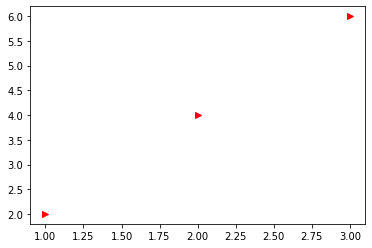

In [10]:
plt.figure()
plt.plot(x,y, 'r>')
plt.show()